km n = 1
km n = 2
km n = 3
km n = 4
km n = 5
km n = 6
km n = 7
km n = 8
km n = 9
km n = 10
km n = 11
km n = 12
km n = 13
km n = 14
km n = 15
km n = 16
km n = 17
km n = 18
km n = 19
km n = 20
km n = 21
km n = 22
km n = 23
km n = 24
km n = 25
km n = 26
km n = 27
km n = 28
km n = 29
km n = 30
km n = 31
km n = 32
km n = 33
km n = 34
km n = 35
km n = 36
km n = 37
km n = 38
km n = 39
km n = 40
km n = 41
km n = 42
km n = 43
km n = 44
km n = 45
km n = 46
km n = 47
km n = 48
km n = 49
km n = 50
km n = 51
km n = 52
km n = 53
km n = 54
km n = 55
km n = 56
km n = 57
km n = 58
km n = 59
km n = 60
km n = 61
km n = 62
km n = 63
km n = 64
km n = 65
km n = 66
km n = 67
km n = 68
km n = 69
km n = 70
km n = 71
km n = 72
km n = 73
km n = 74
km n = 75
km n = 76
km n = 77
km n = 78
km n = 79
km n = 80
km n = 81
km n = 82
km n = 83
km n = 84
km n = 85
km n = 86
km n = 87
km n = 88
km n = 89
km n = 90
km n = 91
km n = 92
km n = 93
km n = 94
km n = 95
km n = 96
km n = 97
km n = 98
km n = 99
km n = 100
km n = 1

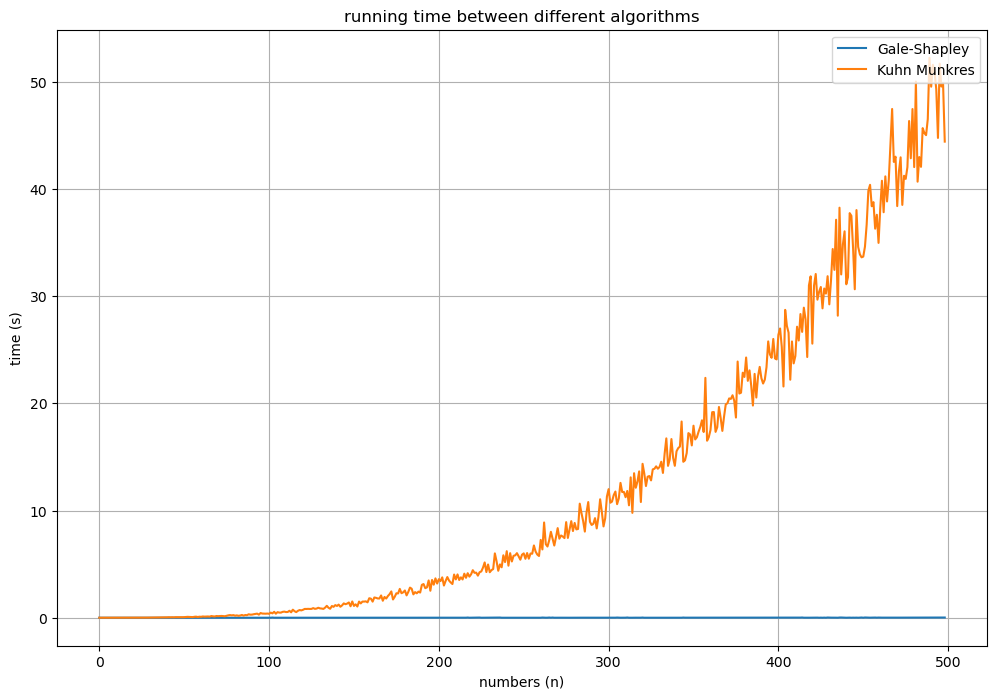

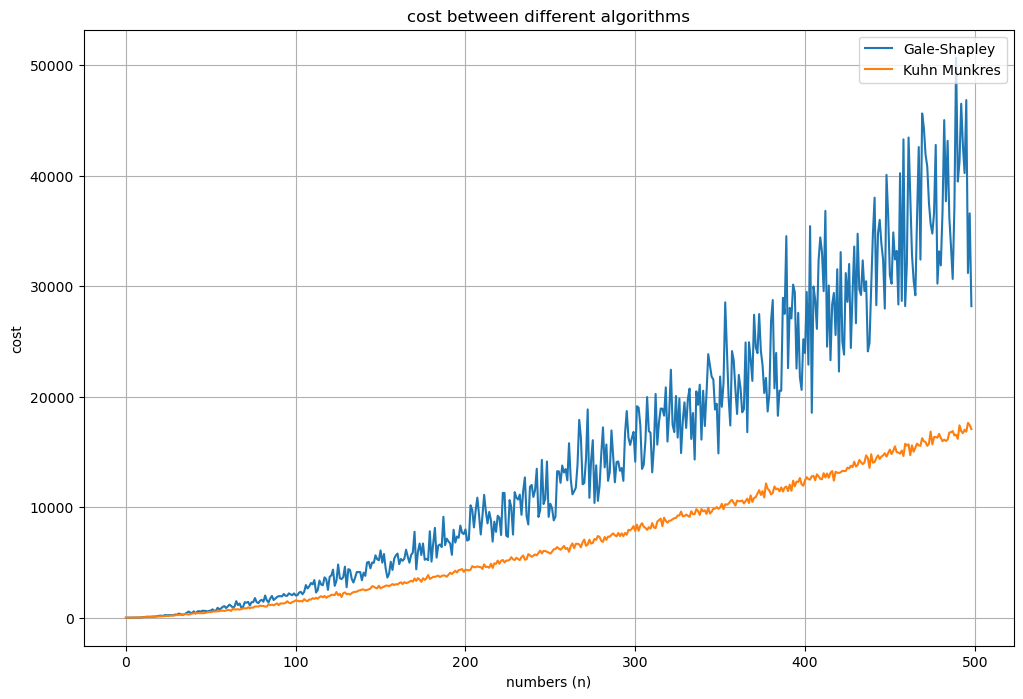

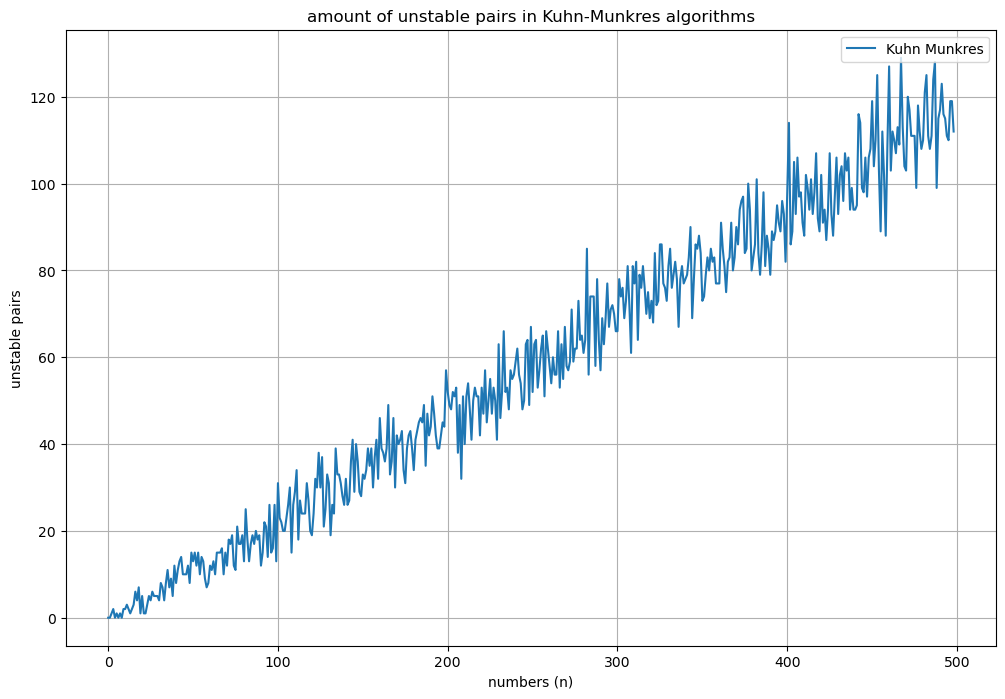

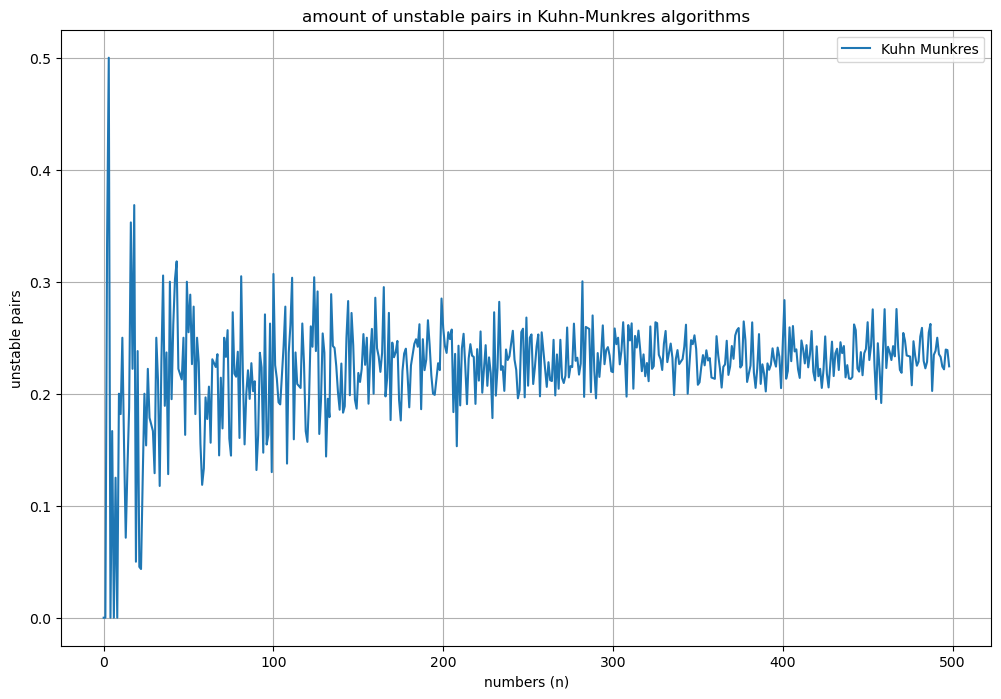

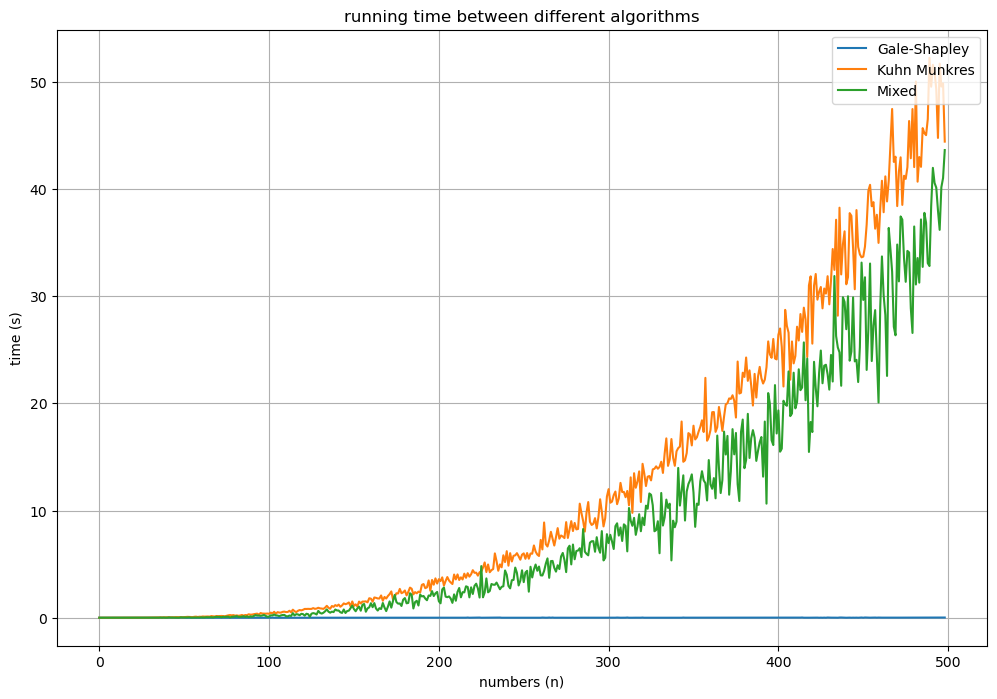

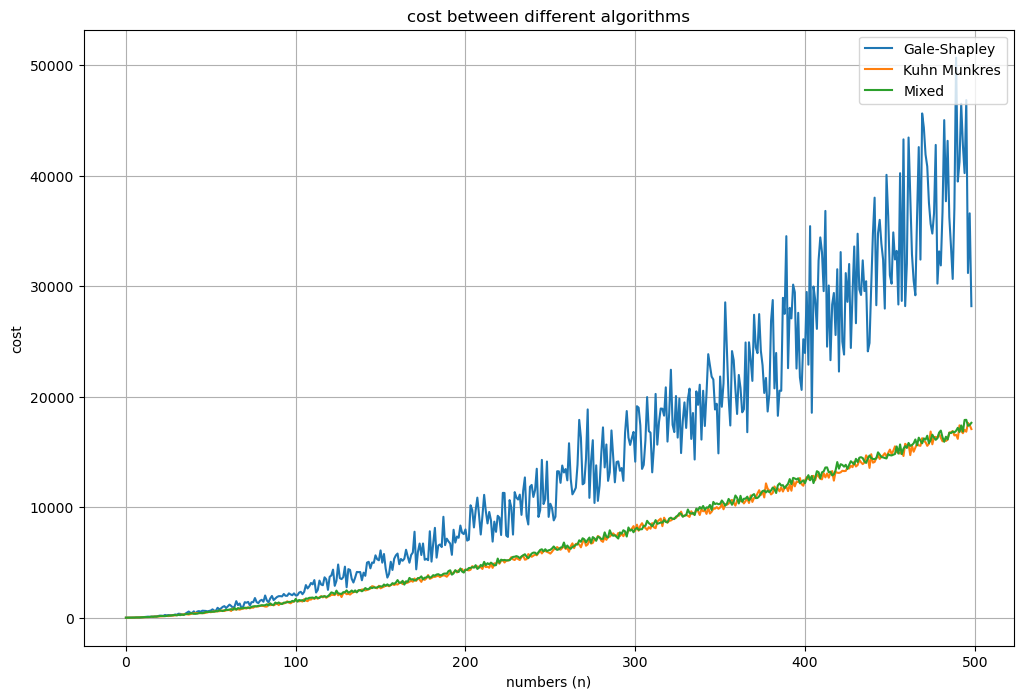

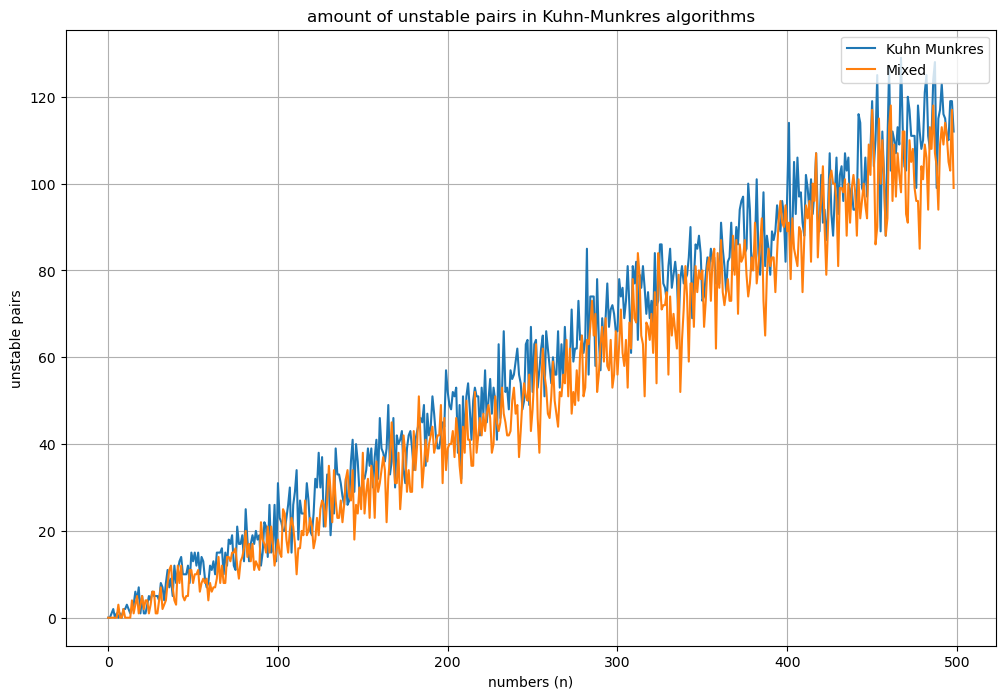

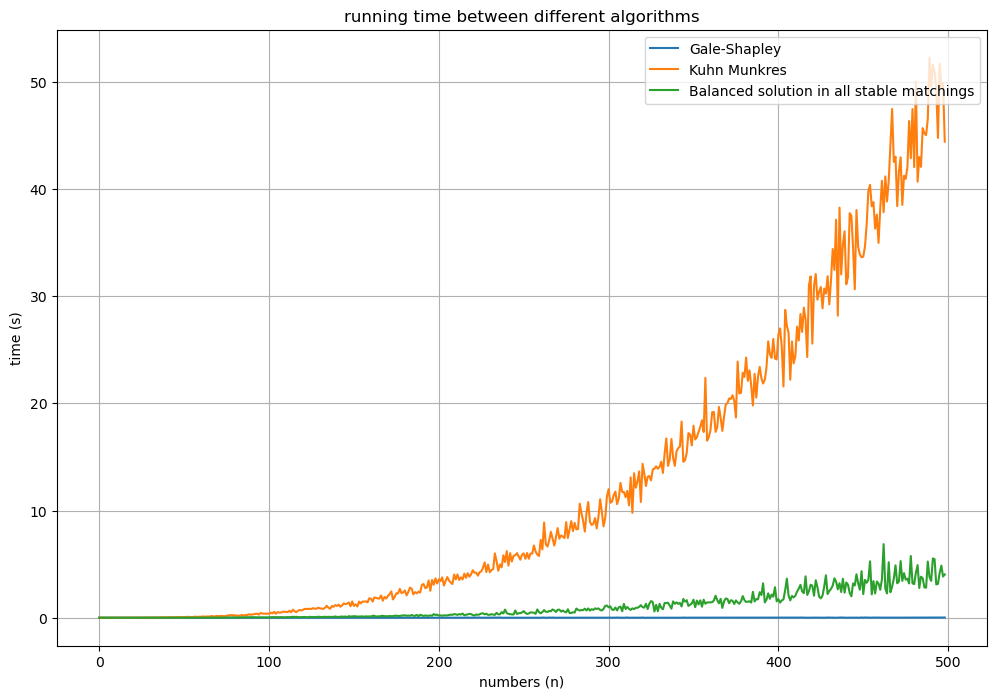

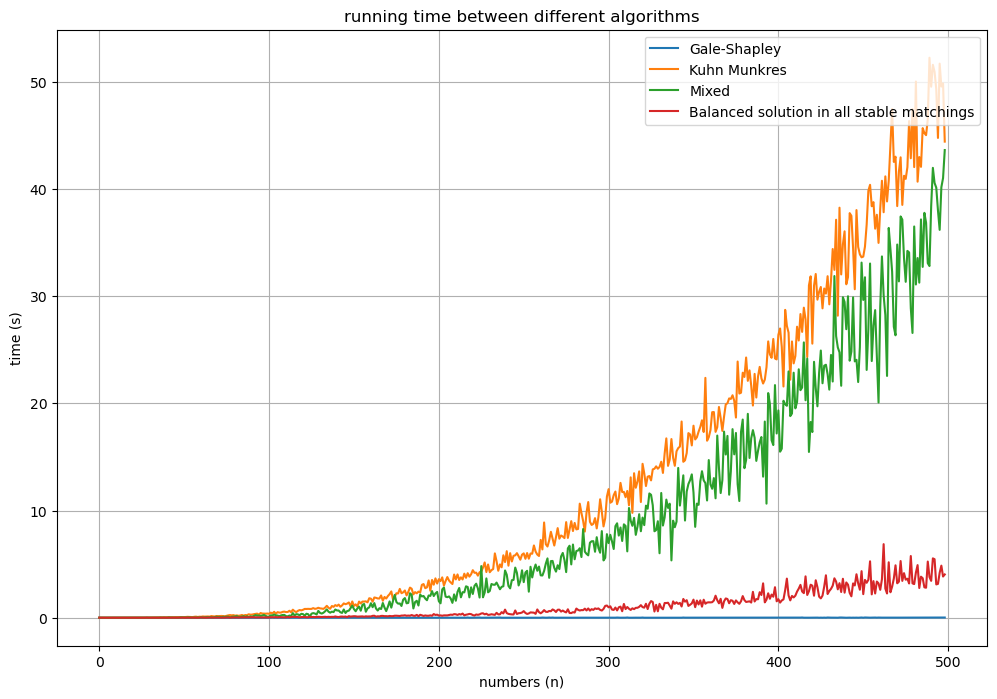

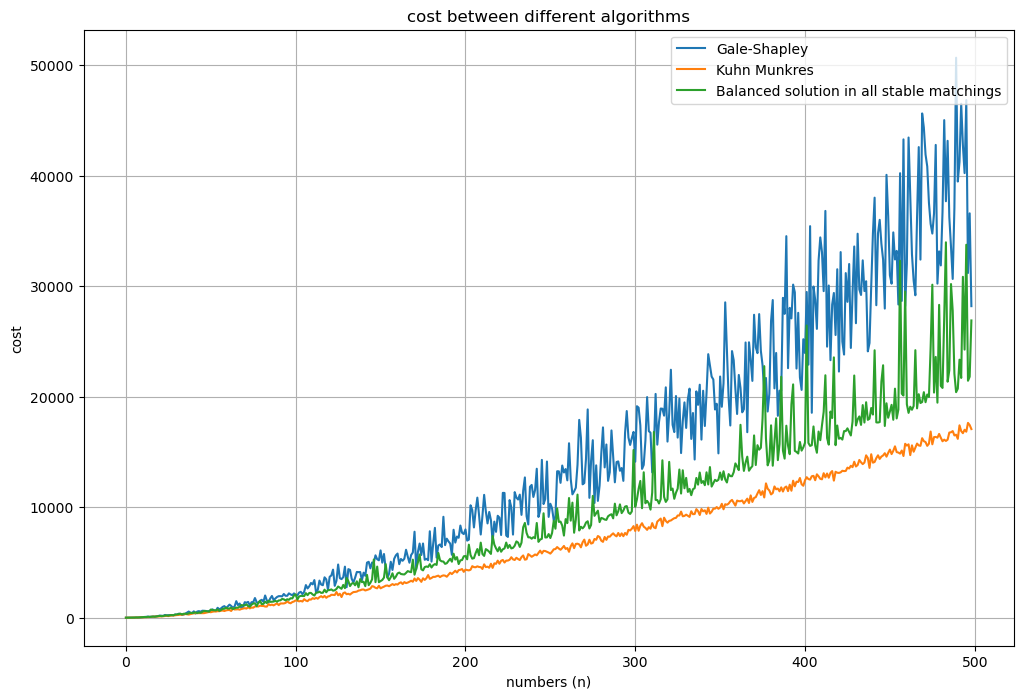

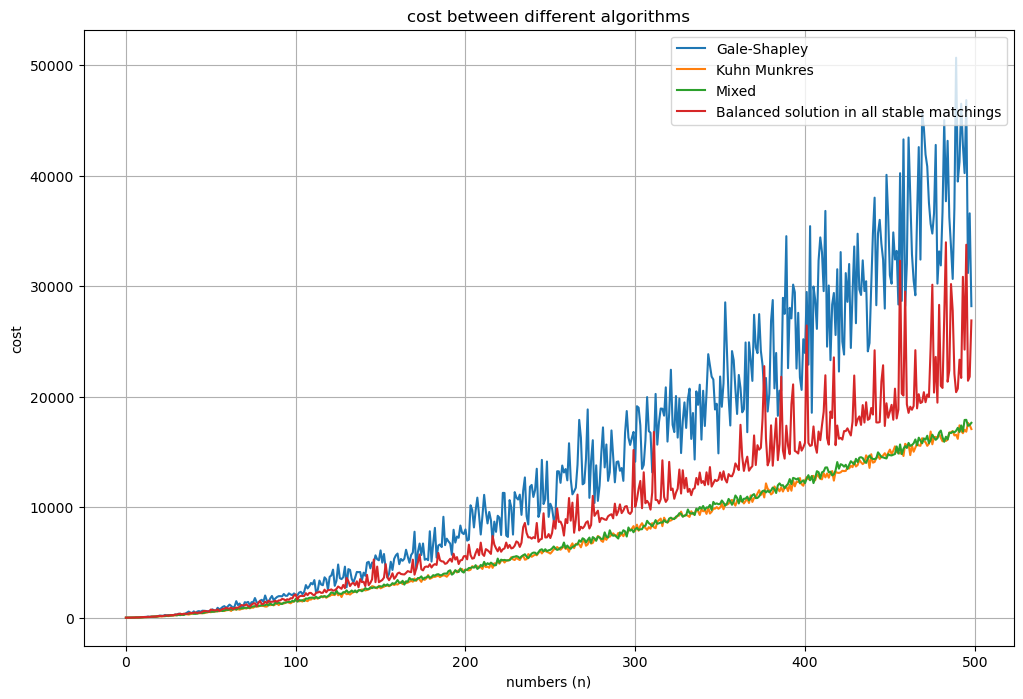

In [6]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy
import time

from munkres import Munkres, print_matrix

#######################################################################
############################# main method #############################
#######################################################################

def main():
    
    '''
    # man & woman cost in man-oriented GS
    n = 500
    man_cost_list = list()
    woman_cost_list = list()
    for i in range(1, n):
        menPreferences = generate_random_matrix(i)
        womenPreferences = generate_random_matrix(i)
        man_cost = one_side_matrix_converter(i, menPreferences, womenPreferences, "man-only")
        woman_cost = one_side_matrix_converter(i, menPreferences, womenPreferences, "woman-only")
        manSpouse = gale_shapley(i, menPreferences, womenPreferences)
        man_cost_list.append(calculate_cost(man_cost, manSpouse))
        woman_cost_list.append(calculate_cost(woman_cost, manSpouse))

    # plot cost
    plt.figure(figsize=(12,8))
    plt.plot(man_cost_list, label='man cost')
    plt.plot(woman_cost_list, label='woman cost')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost (the lower the better)')
    plt.legend(loc='upper right')
    plt.title('cost difference in man-oriented Gale-Shapley') 
    '''
    
    '''
    # percentage for unstable pair in KM
    n = 500
    type = "km_percentage"
    [preference_matrix_list_km, outcome_list_km, duration_list_km, cost_km, unstable_pairs_list_km] = automated_test(n, type)
    # plot duration 
    plt.figure(figsize=(12,8))
    plt.plot(unstable_pairs_list_km, label='Kuhn-Munkres')
    #x = np.linspace(0,len(duration_list_km))
    #plt.plot(x,x**3,label='y=x^3')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('percentage')
    plt.legend(loc='upper right')
    plt.title('percentage of unstable pair in Kuhn-Munkres algorithm') 
    '''

    '''
    # percentage of same solution in one side Kuhn-Munkres algorithm
    n = 500
    man_oriented_KM = list()
    woman_oriented_KM = list()
    same_solution = list()
    for i in range(1, n):
        menPreferences = generate_random_matrix(i)
        womenPreferences = generate_random_matrix(i)
        man_cost = one_side_matrix_converter(i, menPreferences, womenPreferences, "man-only")
        woman_cost = one_side_matrix_converter(i, menPreferences, womenPreferences, "woman-only")
        # man-oriented Hungarian
        manSpouse = kuhn_munkres(man_cost)
        man_oriented_KM.append(manSpouse)
        # woman-oriented Hungarian
        womanSpouse = kuhn_munkres(woman_cost)
        woman_oriented_KM.append(womanSpouse)
        # get ready for counting the same solution
        manSpouse_dict = manSpouse_to_dict(manSpouse)
        womanSpouse_dict = manSpouse_to_dict(womanSpouse)
        converted_womanSpouse_dict = resort_dict(change_key_to_value(womanSpouse_dict))
        # count the percentage of same sloution
        count = 0
        for j in range(i):
            if manSpouse_dict[j] == converted_womanSpouse_dict[j]:
                count += 1
        percentage = count / i        
        same_solution.append(percentage)  
    # plot duration 
    plt.figure(figsize=(12,8))
    plt.plot(same_solution, label='one side Kuhn-Munkres')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('percentage')
    plt.legend(loc='upper right')
    plt.title('percentage of same solution in one side Kuhn-Munkres algorithm') 
    '''  

    
    # automated test
    n = 500
    [preference_matrix_list_gs, outcome_list_gs, duration_list_gs, cost_gs, unstable_pairs_list_gs, unstable_percentage_list_gs] = automated_test(n, 'gs')
    [preference_matrix_list_km, outcome_list_km, duration_list_km, cost_km, unstable_pairs_list_km, unstable_percentage_list_km] = automated_test(n, 'km')
    [preference_matrix_list_mixed, outcome_list_mixed, duration_list_mixed, cost_mixed, unstable_pairs_list_mixed, unstable_percentage_list_mixed] = automated_test(n, 'mixed')
    [preference_matrix_list_all, outcome_list_all, duration_list_all, cost_all, unstable_pairs_list_all, unstable_percentage_list_all] = automated_test(n, 'all_stable_matching')

    ############################# GS & KM #############################

    # plot duration 
    plt.figure(figsize=(12,8))
    plt.plot(duration_list_gs, label='Gale-Shapley')
    plt.plot(duration_list_km, label='Kuhn Munkres')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('time (s)')
    plt.legend(loc='upper right')
    plt.title('running time between different algorithms') 

    # plot total cost
    plt.figure(figsize=(12,8))
    plt.plot(cost_gs, label='Gale-Shapley')
    plt.plot(cost_km, label='Kuhn Munkres')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    plt.title('cost between different algorithms')  

    # plot the amount of unstable pairs
    plt.figure(figsize=(12,8))
    plt.plot(unstable_pairs_list_km, label='Kuhn Munkres')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('unstable pairs')
    plt.legend(loc='upper right')
    plt.title('amount of unstable pairs in Kuhn-Munkres algorithms') 

    # plot the percentage of unstable pairs
    plt.figure(figsize=(12,8))
    plt.plot(unstable_percentage_list_km, label='Kuhn Munkres')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('unstable pairs')
    plt.legend(loc='upper right')
    plt.title('amount of unstable pairs in Kuhn-Munkres algorithms') 
    
    ############################### mixed ###############################

    # plot duration 
    plt.figure(figsize=(12,8))
    plt.plot(duration_list_gs, label='Gale-Shapley')
    plt.plot(duration_list_km, label='Kuhn Munkres')
    plt.plot(duration_list_mixed, label='Mixed')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('time (s)')
    plt.legend(loc='upper right')
    plt.title('running time between different algorithms') 

    # plot total cost
    plt.figure(figsize=(12,8))
    plt.plot(cost_gs, label='Gale-Shapley')
    plt.plot(cost_km, label='Kuhn Munkres')
    plt.plot(cost_mixed, label='Mixed')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    plt.title('cost between different algorithms')  

    # plot the amount of unstable pairs
    plt.figure(figsize=(12,8))
    plt.plot(unstable_pairs_list_km, label='Kuhn Munkres')
    plt.plot(unstable_pairs_list_mixed, label='Mixed')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('unstable pairs')
    plt.legend(loc='upper right')
    plt.title('amount of unstable pairs in Kuhn-Munkres algorithms') 
    
    ################################ all ################################
    
    # plot duration 
    plt.figure(figsize=(12,8))
    plt.plot(duration_list_gs, label='Gale-Shapley')
    plt.plot(duration_list_km, label='Kuhn Munkres')
    plt.plot(duration_list_all, label='Balanced solution in all stable matchings')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('time (s)')
    plt.legend(loc='upper right')
    plt.title('running time between different algorithms') 

    # plot duration 
    plt.figure(figsize=(12,8))
    plt.plot(duration_list_gs, label='Gale-Shapley')
    plt.plot(duration_list_km, label='Kuhn Munkres')
    plt.plot(duration_list_mixed, label='Mixed')
    plt.plot(duration_list_all, label='Balanced solution in all stable matchings')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('time (s)')
    plt.legend(loc='upper right')
    plt.title('running time between different algorithms') 

    # plot total cost
    plt.figure(figsize=(12,8))
    plt.plot(cost_gs, label='Gale-Shapley')
    plt.plot(cost_km, label='Kuhn Munkres')
    plt.plot(cost_all, label='Balanced solution in all stable matchings')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    plt.title('cost between different algorithms') 

    # plot total cost
    plt.figure(figsize=(12,8))
    plt.plot(cost_gs, label='Gale-Shapley')
    plt.plot(cost_km, label='Kuhn Munkres')
    plt.plot(cost_mixed, label='Mixed')
    plt.plot(cost_all, label='Balanced solution in all stable matchings')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    plt.title('cost between different algorithms') 


    '''
    n = 200
    KM_cost = list()
    GS_cost = list()
    KM = list()
    GS = list()
    for i in range(3, n):
        menPreferences = generate_random_matrix(i)
        womenPreferences = generate_random_matrix(i)
        cost_matrix = matrix_converter(i, menPreferences, womenPreferences)
        # gs
        gs_outcome = gale_shapley(i, menPreferences, womenPreferences)
        gs = calculate_cost(cost_matrix, gs_outcome)
        GS.append(gs)
        # km
        km_outcome = kuhn_munkres(cost_matrix)
        km = calculate_cost(cost_matrix, km_outcome)
        KM.append(km)
        # mixed algorithm
        [outcome, ans_type] = mixed_algorithm(i, menPreferences, womenPreferences, "type_also")
        # calc the cost provided by GS and KM
        km_cost = 0
        gs_cost = 0
        for j in range(i): # -1 for km and 1 for gs
            if ans_type[j] == -1:
                km_cost += cost_matrix[j][outcome[j]]
            else:
                gs_cost += cost_matrix[j][outcome[j]]       
        # input the percentage
        cost = calculate_cost(cost_matrix, outcome)
        km_percentage = km_cost / cost   
        KM_cost.append(km_cost)
        gs_percentage = gs_cost / cost      
        GS_cost.append(gs_cost)
    # plot    
    plt.figure(figsize=(12,8))
    plt.plot(GS, label='Gale-Shapley')
    plt.plot(KM, label='Kuhn-Munkres')
    plt.plot(GS_cost, label='Gale-Shapley part in mixed')
    plt.plot(KM_cost, label='Kuhn-Munkres part in mixed')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    plt.title('cost produced by different algorithms') 
    '''

    '''
    n = 500
    menPreferences = generate_random_matrix(n)
    womenPreferences = generate_random_matrix(n)
    cost_matrix = matrix_converter(n, menPreferences, womenPreferences)
    man_cost_matrix = one_side_matrix_converter(n, menPreferences, womenPreferences, "man-only")
    woman_cost_matrix = one_side_matrix_converter(n, menPreferences, womenPreferences, "woman-only")
    all_stable_matchings = all_stable_GS(n, menPreferences, womenPreferences)
    total_cost = list()
    man_cost = list()
    woman_cost = list()
    for matching in all_stable_matchings:
        total_cost.append(calculate_cost(cost_matrix, matching))
        man_cost.append(calculate_cost(man_cost_matrix, matching))
        woman_cost.append(calculate_cost(woman_cost_matrix, matching))
    # woman_oriented = gale_shapley(n, womenPreferences, menPreferences)
    # outcome = [None] * n
    # for i in range(n):
    #     outcome[woman_oriented[i]] = i
    # print(f'woman oriented \n{outcome}')

    # plot    
    plt.figure(figsize=(12,8))
    plt.plot(total_cost, label='total cost')
    plt.plot(man_cost, label='man cost')
    plt.plot(woman_cost, label='woman cost')
    plt.grid(True)
    plt.xlabel('numbers (n)')
    plt.ylabel('cost')
    plt.legend(loc='upper right')
    plt.title('cost change in break marriage') 
    '''

#######################################################################
############################# algorithms ##############################
#######################################################################

######################## Gale Shapley algorithm #######################

def gale_shapley(n, menPreferences, womenPreferences, default = "Not") -> list:
    '''
    the main body of Gale Shapley algorithm
    :param n: int, the length of menPreferences and womenPreferences
    :param menPreferences: list of list, store the preference for each man
    :param womenPreferences: list of list, store the preference for each women
    :return: list, return men's spouse
    '''
    n = len(menPreferences)
    unmarriedMen = list(range(n))
    manSpouse = [None] * n
    womanSpouse = [None] * n
    nextManChoice = [0] * n
    # While there exists at least one unmarried man:
    while unmarriedMen:
        # Pick an arbitrary unmarried man
        he = unmarriedMen[0]
        # Store his ranking in this variable for convenience
        hisPreferences = menPreferences[he]
        # Find a woman to propose to
        she = hisPreferences[nextManChoice[he]]
        # Store her ranking in this variable for convenience
        herPreferences = womenPreferences[she]
        # Find the present husband of the selected woman (it might be None)
        currentHusband = womanSpouse[she]
        if currentHusband is None:
            manSpouse[he] = she
            womanSpouse[she] = he
            unmarriedMen.remove(he)
            nextManChoice[he] += 1
        else:
            if herPreferences.index(he) < herPreferences.index(currentHusband):
                manSpouse[he] = she
                womanSpouse[she] = he
                unmarriedMen.remove(he)
                nextManChoice[he] += 1
                unmarriedMen.append(currentHusband)
            else:
                nextManChoice[he] += 1
                continue
    # printer        
    if default == "print":
        print("the outcome of Gale Shapley algorithm is:")
        i = 0
        for man in manSpouse:
            print(f'man {i+1} -> woman {man+1}')
            i += 1
    return manSpouse

def gale_shapley_with_breakmarriage(n, menPreferences, womenPreferences, manSpouse, dumped_man) -> list:
    '''
    the main body of Gale Shapley algorithm
    :param n: int, the length of menPreferences and womenPreferences
    :param menPreferences: list of list, store the preference for each man
    :param womenPreferences: list of list, store the preference for each women
    :param manSpouse: list, store the current wife for each man
    :param dumped_man: int, the man being damped by his spouse
    :return: list, return men's spouse
    '''
    # initial setup
    unmarriedMen = list()
    unmarriedMen.append(dumped_man)    
    newWomanSpouse = [None] * n
    womanSpouse = [None] * n
    for man in range(len(newWomanSpouse)):
        woman = manSpouse[man]        
        womanSpouse[woman] = copy.copy(man)
        if man != dumped_man:
            newWomanSpouse[woman] = man 
    nextManChoice = [0] * n
    nextManChoice[dumped_man] = menPreferences[dumped_man].index(manSpouse[dumped_man]) + 1
    # While there exists at least one unmarried man:
    while unmarriedMen: 
        # Pick an arbitrary unmarried man
        he = unmarriedMen[0]
        # Examine if there is out of index    
        if nextManChoice[he] >= n:
            manSpouse = "the breakmarriage failed"
            break 
        # Store his ranking in this variable for convenience
        hisPreferences = menPreferences[he]
        # Find a woman to propose to
        she = hisPreferences[nextManChoice[he]]
        # Store her ranking in this variable for convenience
        herPreferences = womenPreferences[she]
        # she only accpet better choice
        if herPreferences.index(he) > herPreferences.index(womanSpouse[she]):
            nextManChoice[he] += 1
            continue 
        # Find the present husband of the selected woman (it might be None)
        currentHusband = newWomanSpouse[she]
        # If she have no spouse        
        if currentHusband is None:
            manSpouse[he] = she
            newWomanSpouse[she] = he
            unmarriedMen.remove(he)
            nextManChoice[he] += 1 
        # If she have a spouse    
        else:
            if herPreferences.index(he) < herPreferences.index(currentHusband):
                manSpouse[he] = she
                newWomanSpouse[she] = he
                unmarriedMen.remove(he)
                nextManChoice[he] += 1
                unmarriedMen.append(currentHusband)
                continue
            else:
                nextManChoice[he] += 1
                continue  
    return manSpouse

######################## Kuhn-Munkres algorithm #######################

def kuhn_munkres(cost_matrix, print_status = "Not") -> list:
    '''
    the main body of Kuhn Munkres algorithm, or Hungarian algorithm
    :param cost_matrix: n * n list, cost matrix generated by the def matrix_converter(n, menPreferences, womenPreferences, default = "cost")
    :param print_status: String, default == "Not", input "print_all" to print the outcome
    :return: list, return men's spouse
    '''
    print(f'km n = {len(cost_matrix)}')
    # make a copy of cost matrix
    matrix = matrix_deep_copy(cost_matrix)
    # start running
    m = Munkres()
    indexes = m.compute(matrix)
    manSpouse = list()
    # transfer indexes tuple into manSpouse list
    for row, column in indexes:
        manSpouse.append(column)
    # printer    
    if print_status == "print_all":
        print_matrix(matrix, msg="Lowest cost through this matrix:")
        total_cost = 0
        print("the outcome of Kuhn-Munkres algorithm is:")
        for row, column in indexes:
            print(f'man {row+1} -> woman {column+1} (with the cost of {cost_matrix[row][column]})')
            total_cost += cost_matrix[row][column]
        print(f'the total cost is {total_cost}')    
    elif print_status == "print":
        print("the outcome of Kuhn-Munkres algorithm is:")
        for row, column in indexes:
            print(f'man {row+1} -> woman {column+1}')      
    return manSpouse

########################### Mixed algorithm ###########################

def mixed_algorithm(n, menPreferences, womenPreferences, default = "default") -> list:
    '''
    the main body of a kind of mixed algorithm
    The optimal solution given by man-oriented and woman-oriented gs algorithm will be given
    And rest of parts will perform Hungarian to get a lower cost
    :param n: int, the length of menPreferences and womenPreferences
    :param menPreferences: list of list, store the preference for each man
    :param womenPreferences: list of list, store the preference for each women
    :return: list, return men's spouse
    '''
    print(f'mixed n = {n}')
    # initial setup
    result = list()
    for i in range(n):
        result.append(-1)
    index = list(range(n)) # mapping km candidate into whole list
    result_type = list() # algorithm used to solve the problem
    for i in range(n):
        result_type.append(-1) # -1 for km and 1 for gs
    # get copies for menPreferences and womenPreferences
    menPreferences_copy = matrix_deep_copy(menPreferences)
    womenPreferences_copy =  matrix_deep_copy(womenPreferences)   
    # get optimal choice by man-oriented gs and woman-oriented gs
    men_outcome = manSpouse_to_dict(gale_shapley(n, menPreferences_copy, womenPreferences_copy))
    women_outcome_unchanged = manSpouse_to_dict(gale_shapley(n, womenPreferences_copy, menPreferences_copy))
    women_outcome = resort_dict(change_key_to_value(women_outcome_unchanged))
    # get simplified preferences lists 
    simplified_menPreferences = matrix_deep_copy(menPreferences_copy)
    simplified_womenPreferences = matrix_deep_copy(womenPreferences_copy)
    # input optimal pairs given by gs algorithm into result list and remove them from the preferences list
    counter = 0
    for man in range(len(men_outcome)):
        if men_outcome[man] == women_outcome[man]:
            # the optimal pair
            woman = men_outcome[man]
            # input the result
            result[man] = woman
            # remove the man from woman's preference list
            for i in range(len(simplified_womenPreferences)):
                simplified_womenPreferences[i].remove(man)
            for i in range(len(womenPreferences_copy)):
                womenPreferences_copy[i].remove(man)
            simplified_womenPreferences.remove(womenPreferences_copy[woman]) 
            # remove the woman from man's preference list
            for i in range(len(simplified_menPreferences)):
                simplified_menPreferences[i].remove(woman)   
            for i in range(len(menPreferences_copy)):
                menPreferences_copy[i].remove(woman) 
            simplified_menPreferences.remove(menPreferences_copy[man]) 
            # remove paired women from index list    
            index.remove(woman) 
            result_type[man] = 1 
            counter += 1        
    # check if there exists unmatched pair   
    if -1 in result:            
        # carry out the Hungarian algorithm by using simplified preference list
        cost_matrix = matrix_converter(len(simplified_menPreferences), simplified_menPreferences, simplified_womenPreferences, False)
        km_outcome = kuhn_munkres(cost_matrix)
        # input the Hungarian outcome into result
        number = 0
        for man in range(n):
            if result_type[man] == -1: # Hungarian
                result[man] = index[km_outcome[number]]
                number += 1
    if default == "type_also":            
        return result, result_type      
    else:
        return result  

######################## all stable matchings #########################
 
def all_stable_GS(n, menPreferences, womenPreferences) -> list:
    # initial setup
    man_oriented = gale_shapley(n, menPreferences, womenPreferences)
    all_stable_matchings = list()
    all_stable_matchings.append(man_oriented)
    # start iterate through all possible matchings  
    manSpouse = copy.copy(man_oriented) 
    for man in range(n): 
        dumped_man = copy.copy(man)
        for trial in range(n):
            manSpouse_copy = copy.copy(manSpouse)
            new_matching = gale_shapley_with_breakmarriage(n, menPreferences, womenPreferences, manSpouse_copy, dumped_man)
            if new_matching == "the breakmarriage failed":
                break
            elif new_matching == manSpouse:
                break
            else:
                all_stable_matchings.append(new_matching)
                manSpouse = copy.copy(new_matching)
    return all_stable_matchings 

def balanced_stable_matching(n, menPreferences, womenPreferences) -> list:
    # initial setup
    minimum_cost = None
    balanced_matching = None
    # generate all stable matching
    all_stable_matchings = all_stable_GS(n, menPreferences, womenPreferences)
    # calculate the one side cost matrix    
    man_cost_matrix = one_side_matrix_converter(n, menPreferences, womenPreferences, "man-only")
    woman_cost_matrix = one_side_matrix_converter(n, menPreferences, womenPreferences, "woman-only")
    # iterate through all stable matching
    for matching in all_stable_matchings:
        man_cost = calculate_cost(man_cost_matrix, matching)
        woman_cost = calculate_cost(woman_cost_matrix, matching)
        difference = abs(man_cost - woman_cost)
        if minimum_cost is None:
            minimum_cost = difference
            balanced_matching = matching
        elif minimum_cost > difference:
            minimum_cost = difference
            balanced_matching = matching
        else:
            pass
    return balanced_matching        

#######################################################################
######################### automated testing ###########################
#######################################################################

def automated_test(n, algorithm):
    '''
    the automate test for 3 different algorithms program
    :param n: int, perform 1 to n bipartite matching
    :param algorithm: String, "gs" for Gale-Shapley, "km" for Kuhn-Munkres, "km_percentage" for Kuhn-Munkres with unstable list cosisted with percentage
    :return: list, list consist with [preference_matrix_list, outcome_list, duration_list, cost, unstable_pairs_list]
    '''
    # initial setup
    preference_matrix_list = list()
    outcome_list = list()
    duration_list = list()
    cost = list()
    unstable_pairs_list = list()
    unstable_percentage_list = list()
    # start the test
    for i in range(1, n):        
        # generate the preference list
        menPreferences = generate_random_matrix(i)
        womenPreferences = generate_random_matrix(i)
        # calculate the cost matrix
        cost_matrix = matrix_converter(i, menPreferences, womenPreferences)
        # record the starting time        
        start_time = time.time()
        # Gale-Shapley algorithm    
        if algorithm == "gs":
            outcome = gale_shapley(i, menPreferences, womenPreferences)
            # record the ending time
            end_time = time.time()
            duration = end_time - start_time
            # input the outcome
            preference_matrix = {'menPreferences': menPreferences, 'womenPreferences': womenPreferences}
            preference_matrix_list.append(preference_matrix)
            outcome_list.append(outcome)
            duration_list.append(duration)
            cost.append(calculate_cost(cost_matrix, outcome))
        # Hungarian algorithm    
        elif algorithm == "km":
            outcome = kuhn_munkres(cost_matrix)
            # record the ending time
            end_time = time.time()
            duration = end_time - start_time
            # calculate the unstable pair
            unstable_pair = count_unstable_pair(menPreferences, womenPreferences, outcome)
            # input the outcome
            preference_matrix = {'menPreferences': menPreferences, 'womenPreferences': womenPreferences}
            preference_matrix_list.append(preference_matrix)
            outcome_list.append(outcome)
            duration_list.append(duration)
            cost.append(calculate_cost(cost_matrix, outcome))
            unstable_percentage = unstable_pair / i
            unstable_pairs_list.append(unstable_pair)
            unstable_percentage_list.append(unstable_percentage)
        # mixed algorithm        
        elif algorithm == "mixed": 
            outcome = mixed_algorithm(i, menPreferences, womenPreferences)   
            # record the ending time
            end_time = time.time()
            duration = end_time - start_time
            # calculate the unstable pair
            unstable_pair = count_unstable_pair(menPreferences, womenPreferences, outcome)
            # input the outcome
            preference_matrix = {'menPreferences': menPreferences, 'womenPreferences': womenPreferences}
            preference_matrix_list.append(preference_matrix)
            outcome_list.append(outcome)
            duration_list.append(duration)
            cost.append(calculate_cost(cost_matrix, outcome))
            unstable_percentage = unstable_pair / i
            unstable_pairs_list.append(unstable_pair)
            unstable_percentage_list.append(unstable_percentage)
        # all stable matching 
        elif algorithm == "all_stable_matching":
            outcome = balanced_stable_matching(i, menPreferences, womenPreferences)   
            # record the ending time
            end_time = time.time()
            duration = end_time - start_time
            # input the outcome
            preference_matrix = {'menPreferences': menPreferences, 'womenPreferences': womenPreferences}
            preference_matrix_list.append(preference_matrix)
            outcome_list.append(outcome)
            duration_list.append(duration)
            cost.append(calculate_cost(cost_matrix, outcome))
    return preference_matrix_list, outcome_list, duration_list, cost, unstable_pairs_list, unstable_percentage_list

#######################################################################
######################### supportive methods ##########################
#######################################################################    

# generate random preference matrix

def generate_random_matrix(n) -> list:
    '''
    the method used to generate n * n preference list 
    :param n: int, the amount of person
    :return: list of list, the list for preference lists
    '''
    preference_matrix = list()
    for i in range(n):
        shuffle = random.sample(list(range(n)),n)
        preference_matrix.append(shuffle)
    return preference_matrix

# calculate the cost matrix

def matrix_converter(n, menPreferences, womenPreferences, default = True, type = "cost") -> list:
    '''
    the method used to calculate the cost matrix with two preferences lists, the key step of transfering 2-sided matching into 1-sided matching
    :param n: int, the length of menPreferences and womenPreferences
    :param menPreferences: list of list, store the preference for each man
    :param womenPreferences: list of list, store the preference for each women
    :param default: Boolean, default = True, input False if indexing is needed
    :param type: String, type = "cost", input "profit" to generate the profit matrix
    :return: list of list, the cost (profit) matrix
    '''
    matrix = np.zeros((n,n), dtype = float)
    # reindexing if needed
    if default == False:
        men_index = copy.copy(womenPreferences[0])
        men_index.sort()
        women_index = copy.copy(menPreferences[0])
        women_index.sort()
    # Firstly, input the men preference into the matrix
    # Pick perference list of each man
    for he in range(n):
        hisPreference = menPreferences[he]
        # Pick every person on his preference list
        for j in range(n):
            # Pick the woman's index 
            she = hisPreference[j]   
            # Input the value into matrix
            if default == False:
                herIndex = women_index.index(she)
                matrix[he, herIndex] = j
            else:                 
                matrix[he, she] = j  
    # Secondly, input the women preference into the matrix
    # Pick perference list of each woman
    for she in range(n):
        herPreference = womenPreferences[she]
        # Pick every person on her preference list
        for j in range(n):
            # Pick the man's index 
            him = herPreference[j]
            # Add the value on the value from matrix
            if default == False:
                hisIndex = men_index.index(him)
                matrix[hisIndex, she] += j
            else:
                matrix[him, she] += j    
    if type == "profit":        
        maximum = matrix.max() * np.ones((n,n))
        matrix = maximum - matrix
    return matrix  

# calculate specific cost matrix

def one_side_matrix_converter(n, menPreferences, womenPreferences, default = "all") -> list:
    '''
    the method used to calculate the cost matrix with two preferences lists, the key step of transfering 2-sided matching into 1-sided matching
    :param n: int, the length of menPreferences and womenPreferences
    :param menPreferences: list of list, store the preference for each man
    :param womenPreferences: list of list, store the preference for each women
    :param default: String, all / man-only / woman-only
    :return: list of list, the cost (profit) matrix
    '''
    matrix = np.zeros((n,n), dtype = float)
    # Firstly, input the men preference into the matrix
    # Pick perference list of each man
    if default == "woman-only":
        pass
    else:
        for he in range(n):
            hisPreference = menPreferences[he]
            # Pick every person on his preference list
            for j in range(n):
                # Pick the woman's index 
                she = hisPreference[j]   
                # Input the value into matrix
                matrix[he, she] = j  
    # Secondly, input the women preference into the matrix
    # Pick perference list of each woman
    if default == "man-only":
        pass
    else:
        for she in range(n):
            herPreference = womenPreferences[she]
            # Pick every person on her preference list
            for j in range(n):
                # Pick the man's index 
                him = herPreference[j]
                # Add the value on the value from matrix
                matrix[him, she] += j    
    return matrix         

# calculate the total cost

def calculate_cost(cost_matrix, manSpouse) -> int:
    '''
    the method used to calculate the cost by using the cost_matrix and manSpouse
    :param cost_matrix: list of list, the cost matrix for algorithms
    :param manSpouse: list, the outcome generated by two algorithms
    :return: int, the cost for the matching
    '''
    total_cost = 0
    for iterator in range(len(manSpouse)):
       total_cost += cost_matrix[iterator][manSpouse[iterator]] 
    return total_cost  

# count the unstable pair (Hungarian Only)
     
def count_unstable_pair(menPreferences, womenPreferences, manSpouse) -> int:
    '''
    the method used to count unstable pairs, cannot be used on Gale Shapley algorithm
    :param menPreferences: list of list, store the preference for each man
    :param womenPreferences: list of list, store the preference for each women
    :param manSpouse: list, the outcome generated by two algorithms
    :return: int, the number of unstable pairs
    '''
    unstablePair = 0
    # iterate through all men 
    for he in range(len(manSpouse)):
        she = manSpouse[he]
        hisPreference = menPreferences[he]
        # check if current spouse is the first choice for the man 
        if she != hisPreference[0]:
            herIndex = hisPreference.index(she)
            # find if there exists a better pair
            for i in range(herIndex):
                potentialWoman = hisPreference[i]
                potentialWomanPreference = womenPreferences[potentialWoman]
                currentHusband = manSpouse.index(potentialWoman)
                if potentialWomanPreference.index(he) < potentialWomanPreference.index(currentHusband):
                    unstablePair += 1
                    break
    return unstablePair

# transfer manSpouse list into dict

def manSpouse_to_dict(manSpouse, default = "not_print") -> dict:
    '''
    the method used to 
    :param manSpouse: list, the outcome generated by two algorithms
    :param default: String, default == "not_print", print the outcome if default == "print"
    :return: dict, the dict for the outcome
    '''
    matching = {}
    for man in range(len(manSpouse)):
        matching[man] = manSpouse[man]
        if default == 'print':
            print(f'man {man} -> woman {matching[man]}')
    return matching    

# exchange key into value

def change_key_to_value(dictionary) -> dict: 
    '''
    method used to exchange the position of key and value of the dict
    :param dictionary: dict, the target dictionary 
    :return: dict, dictionary with the key and value exchanged
    '''
    result = dict()
    for key, value in dictionary.items():
        result[value] = key
    return result   

# resort the dictionary

def resort_dict(dictionary) -> dict: 
    '''
    method used to resort the dictionary by key
    :param dictionary: dict, the target dict need to be resorted
    :return: dict, the resorted dictionary
    '''
    new_dict = dict()
    for i in range(len(dictionary)):
        new_dict[i] = dictionary[i]
    return new_dict    

# deep copy

def matrix_deep_copy(matrix):
    '''
    method used to deep copy the matrix
    :param matrix: list of list, matrix need to be copied
    :return: list of list, copied matrix
    '''
    result = list()
    for line in matrix:
        cache = list()
        for item in line:
            cache.append(item)
        result.append(cache)    
    return result       


#######################################################################
################################# end #################################
#######################################################################
   
if __name__ == '__main__':
    main()